<a href="https://colab.research.google.com/github/ky106031/ds_study/blob/main/%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92_%E4%BB%8A%E4%BA%95%E5%85%88%E7%94%9F%E5%9B%9E_k_means_k_means%2B%2B(%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
X = np.load("mvn_data.npy")
X = np.concatenate(X)

In [ ]:
X.shape

(900, 2)

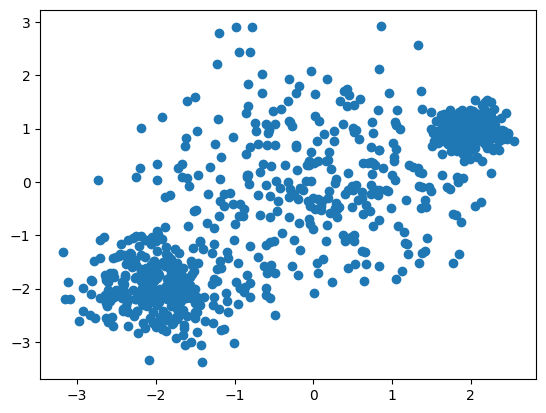

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1234)
y_km = km.fit_predict(X)

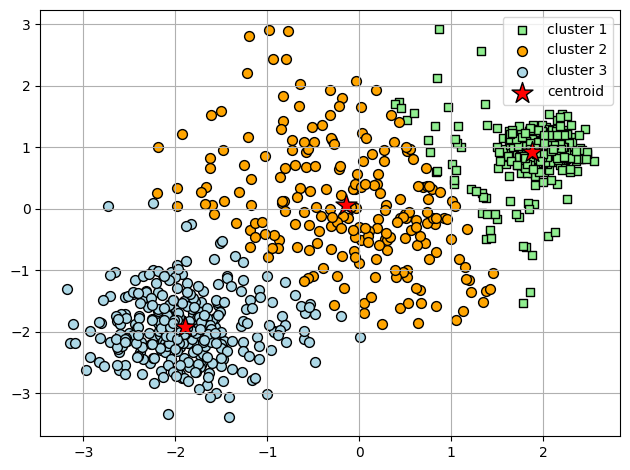

In [ ]:
plt.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            edgecolor='black',
            label='centroid')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# クラスタ内誤差平方和
print('Distortion:  %.2f' % km.inertia_)

Distortion:  634.55


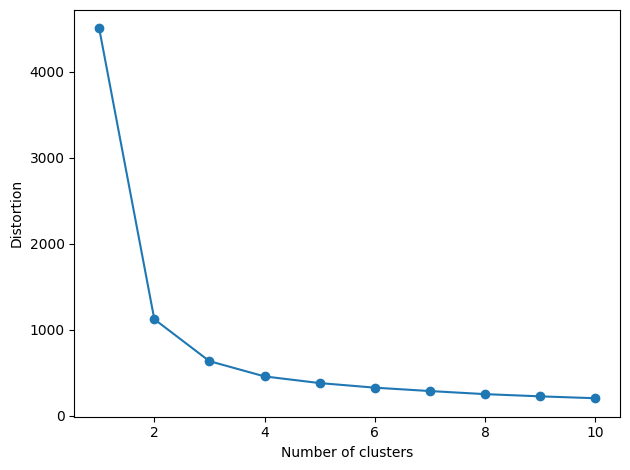

In [ ]:
# Elbow method
# 可視化の結果、k=3が良い選択であるという根拠が得られる。
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### k-means++

In [ ]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

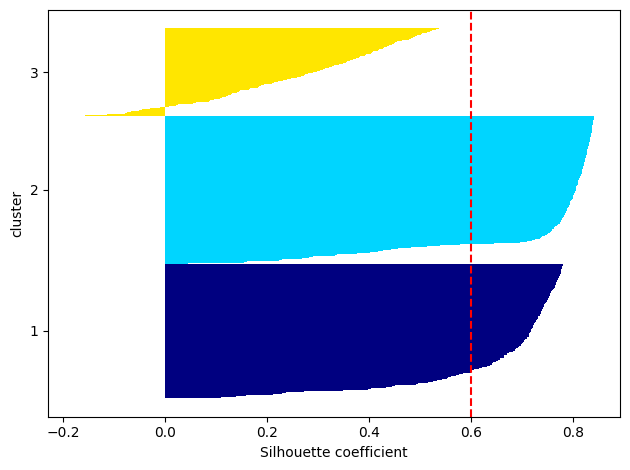

In [ ]:
# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower,y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()